In [0]:
# Install the OpenAI API client to interact with OpenAI's language models
%pip install openai 
# Install PyPDF for handling and extracting text from PDF files
%pip install pypdf 
# Install PyTorch, a deep learning framework for AI and machine learning tasks
%pip install torch 
# Install the Transformers library, which provides pre-trained models for NLP tasks
%pip install transformers 
# Install Pillow, a Python Imaging Library (PIL) fork for handling images
%pip install pillow 
# Install Requests, a library for making HTTP requests (useful for API calls)
%pip install requests 
# Install SentencePiece, a tokenizer used in NLP tasks, especially for BERT and GPT models
%pip install sentencepiece 
# Install Torchvision, a PyTorch package for image processing and computer vision tasks
%pip install torchvision 
# Install Accelerate, a library that optimizes model training on various hardware accelerators (e.g., GPUs, TPUs)
%pip install 'accelerate>=0.26.0' 
%pip install transformers
%pip install pdf2image 
%pip install pillow
# Restart the Python environment to apply the installed packages
dbutils.library.restartPython() 
# List the secrets stored in the Databricks secret scope (useful for securely storing API keys and credentials)
dbutils.secrets.list(scope="intsearch-kv-dev")

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.r

[SecretMetadata(key='AISEARCH-DEV-ENDPOINT'),
 SecretMetadata(key='AISEARCH-DEV-KEY'),
 SecretMetadata(key='AISEARCH-DEV-NAME'),
 SecretMetadata(key='AISEARCH-DEV-VERSION'),
 SecretMetadata(key='AISEARCH-ENDPOINT'),
 SecretMetadata(key='AISEARCH-INTSEARCH-DEV-1-KEY'),
 SecretMetadata(key='AISEARCH-KEY'),
 SecretMetadata(key='AISEARCH-NAME'),
 SecretMetadata(key='AISEARCH-SHERLOCK-CHATOPG-SECRET'),
 SecretMetadata(key='AISEARCH-VERSION'),
 SecretMetadata(key='APIM-PTU-KEY'),
 SecretMetadata(key='APIM-PTU-VERSION'),
 SecretMetadata(key='AS9-CONN-STRING'),
 SecretMetadata(key='AS9-PASSWORD'),
 SecretMetadata(key='AS9-USER-ID'),
 SecretMetadata(key='azfn-get-file-info-key'),
 SecretMetadata(key='BLOB-ACCOUNT-KEY'),
 SecretMetadata(key='BLOB-ACCOUNT-NAME'),
 SecretMetadata(key='DOCUMENTUM-PASSWORD'),
 SecretMetadata(key='DOCUMENTUM-USER-ID'),
 SecretMetadata(key='FORM-RECOGNIZAER-ENDPOINT'),
 SecretMetadata(key='FORM-RECOGNIZAER-KEY'),
 SecretMetadata(key='intesearch-dataextraction-sqldb-co

In [0]:
%sh sudo apt-get update && sudo apt-get install -y poppler-utils

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://repos.azul.com/zulu/deb stable InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Reading package lists...


W: https://repos.azul.com/zulu/deb/dists/stable/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), see the DEPRECATION section in apt-key(8) for details.


Reading package lists...
Building dependency tree...
Reading state information...
poppler-utils is already the newest version (22.02.0-2ubuntu0.6).
0 upgraded, 0 newly installed, 0 to remove and 73 not upgraded.


In [0]:
# Import required libraries
import torch  # Deep learning framework
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor  # Model & Processor
from pdf2image import convert_from_path  # Convert PDF pages to images
from PIL import Image  # Image processing
import json  # JSON formatting
import os  # OS utilities
import matplotlib.pyplot as plt

In [0]:
def pdf_to_image(pdf_path):
    """
    Converts the first page of a PDF into an image.
    
    Args:
        pdf_path (str): Path to the PDF file.
    
    Returns:
        PIL.Image: Extracted image of the first page.
    """
    images = convert_from_path(pdf_path, first_page=1, last_page=1, dpi=300)  # Convert first page to image
    if not images:
        return None
    
    image = images[0]
    
    # Resize while maintaining aspect ratio
    max_size = 1200
    width, height = image.size
    scale_factor = max_size / max(width, height)
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    image = image.resize((new_width, new_height), Image.LANCZOS)
    
    return image

# Define PDF path
pdf_path = "/Workspace/Users/aathushan.kugendran@xxx.com/VLM Source Data/Sparse-Pre-training-and-Dense-Fine-tuning-for-Large-Language-Models.pdf"

# Convert first page to an image
pdf_image = pdf_to_image(pdf_path)

# Save and display the image (for debugging)
if pdf_image:
    pdf_image.save("first_page.png")
    pdf_image.show()


In [0]:
# Detect the best available device (GPU/CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load model processor
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")

# Load model with optimal settings for Databricks
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct",
    torch_dtype=torch.bfloat16,  # Optimized precision
    device_map="auto"  # Automatically selects available devices
).to(device)  # Move model to GPU if available

# Compile the model (if on GPU) for speed optimization
if torch.cuda.is_available():
    model = torch.compile(model)

print(f"✅ Model loaded successfully on: {device.upper()}")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

✅ Model loaded successfully on: CPU


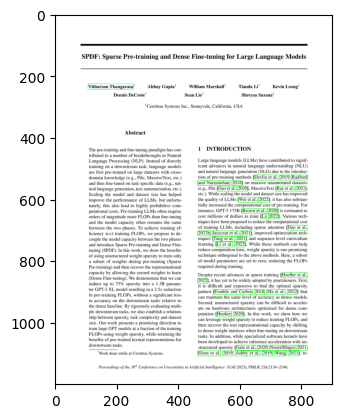

In [0]:
def process_pdf_image_for_vlm(image):
    """
    Prepares the extracted PDF image for processing by the Vision-Language Model.
    
    Args:
        image (PIL.Image): The extracted image.
    
    Returns:
        PIL.Image: Optimized image.
    """
    if image.mode != "RGB":
        image = image.convert("RGB")  # Ensure RGB mode
    
    #image = image.resize((1024, 1024))  # Resize for balanced performance
    
    return image

# Optimize the extracted image
optimized_image = process_pdf_image_for_vlm(pdf_image)
plt.imshow(optimized_image)
plt.show()

In [0]:
# JSON schema for structured output
json_schema = {
    "title": "",
    "authors": "",
    "abstract": "",
    "keywords": [],
    "publication_date": "",
    "journal": "",
    "sections": {}
}

In [0]:
# Prepare model input with structured instructions
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": optimized_image},  # Pass optimized image
            {"type": "text", "text": f"""
You are a Vision-Language AI designed to extract structured information from documents. 
Analyze the image and return a **JSON** output following this schema:

{json.dumps(json_schema, indent=4)}

### **Extraction Guidelines:**
- **Ensure all fields are filled based on visible content.**
- **If a value is missing, return 'N/A' instead of omitting it.**
- **Use concise but meaningful extracted text.**
- **Ensure correct field mappings (Title → title, Authors → authors, etc.).**

Now, extract the structured information accordingly.
"""}  # Well-structured instruction prompt
        ],
    },
]

# Process input for the model
inputs = processor(
    text=processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True),
    images=optimized_image,
    padding=True,
    return_tensors="pt"
).to(device)  # Move tensors to GPU if available

print("✅ Optimized Input Ready for Processing!")

✅ Optimized Input Ready for Processing!


In [0]:
# Generate response using the model
output = model.generate(**inputs, max_new_tokens=500)  # Limit response to 500 tokens

# Decode output to readable text
generated_text = processor.batch_decode(output, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

# Print raw extracted text (for debugging)
print("📜 Extracted Text:\n", generated_text[:5000])  # Display first 1000 characters

📜 Extracted Text:
 system
You are a helpful assistant.
user

You are a Vision-Language AI designed to extract structured information from documents. 
Analyze the image and return a **JSON** output following this schema:

{
    "title": "",
    "authors": "",
    "abstract": "",
    "keywords": [],
    "publication_date": "",
    "journal": "",
    "sections": {}
}

### **Extraction Guidelines:**
- **Ensure all fields are filled based on visible content.**
- **If a value is missing, return 'N/A' instead of omitting it.**
- **Use concise but meaningful extracted text.**
- **Ensure correct field mappings (Title → title, Authors → authors, etc.).**

Now, extract the structured information accordingly.

assistant
```json
{
    "title": "SPPDF: Sparse Pre-training and Dense Fine-tuning for Large Language Models",
    "authors": [
        {
            "name": "Vithursan Thangarasa",
            "affiliation": "Cerebras Systems Inc., Sunnyvale, California, USA"
        },
        {
          